### variance, mean, standard deviation and skew

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skew
import pandas as pd
import seaborn as sns

In [3]:
sample_size = 100000
ratings = np.random.randint(1, 6, sample_size)
right_skew_data = np.concatenate((ratings, np.random.randint(1, 2, sample_size // 2)))

In [4]:
left_skew_data = np.concatenate((ratings, np.random.randint(4, 5, sample_size // 2)))
print(left_skew_data, right_skew_data)

[3 2 3 ... 4 4 4] [3 2 3 ... 1 1 1]


In [5]:
def calculate_stats(data):
    mean = np.mean(data)
    median = np.median(data)
    skewness = skew(data)
    return mean, median, skewness

In [6]:
def plot_histogram(ax, data, title):
    ax.hist(data, bins = np.arange(1,7) - 0.5, rwidth = 0.8, alpha = 0.7)
    ax.set_title(title)
    ax.set_xlabel('Rating')
    ax.set_ylabel('Frequency')
    ax.set_xticks(range(1,6))
    ax.grid(axis = 'y', alpha = 0.5)

    mean, median, skewness = calculate_stats(data)
    ax.axvline(x = mean, color = 'red', linestyle = '--', label = f"mean: {mean:.2f}")  # axvline is vertical line to be printed on mean i.e positon of x
    ax.axvline(x = median, color = 'blue', linestyle = '--', label = f"median: {median:.2f}")
    ax.legend()

    print(f"{title}:")
    print(f"Mean: {mean: .2f}")
    print(f"Skewness: {skewness: .2f}")
    print()

No Skew:
Mean:  3.00
Skewness:  0.00

Right Skew:
Mean:  2.33
Skewness:  0.63

Left Skew:
Mean:  3.33
Skewness: -0.64



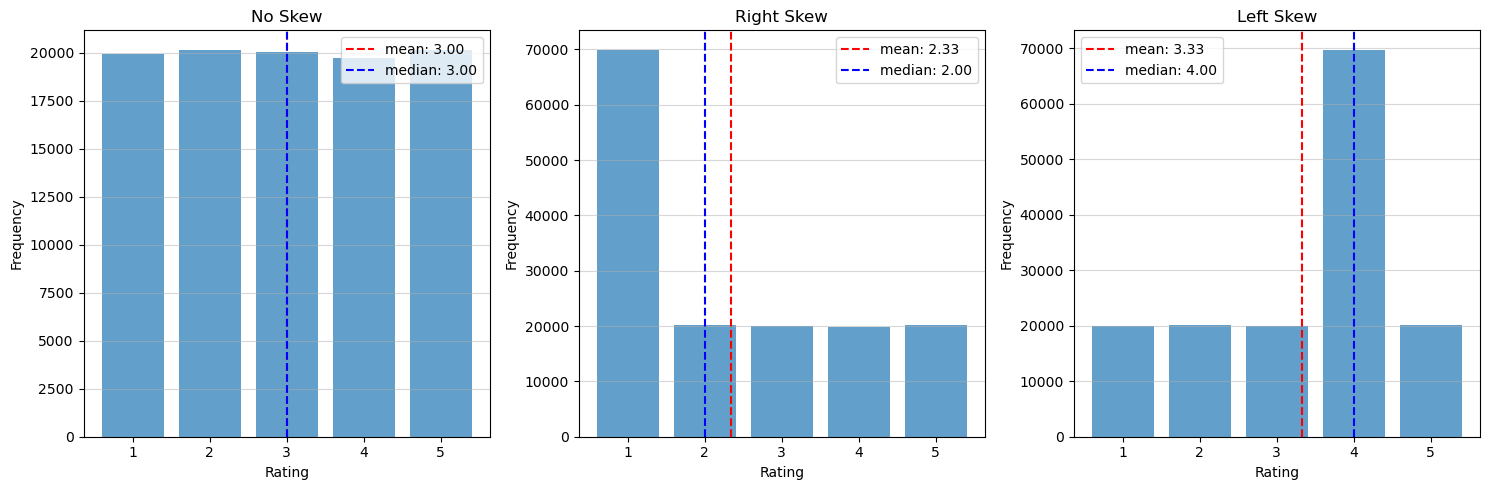

In [7]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize=(15,5))

plot_histogram(ax[0], ratings, 'No Skew')
plot_histogram(ax[1], right_skew_data, 'Right Skew')
plot_histogram(ax[2], left_skew_data, 'Left Skew')
plt.tight_layout()
plt.show()


### skewness

C:\Users\DAI.STUDENTSDC\AppData\Local\Temp\ipykernel_19916\1137797872.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  airline_df = pd.read_csv('airline_dec_2008_50k.csv')


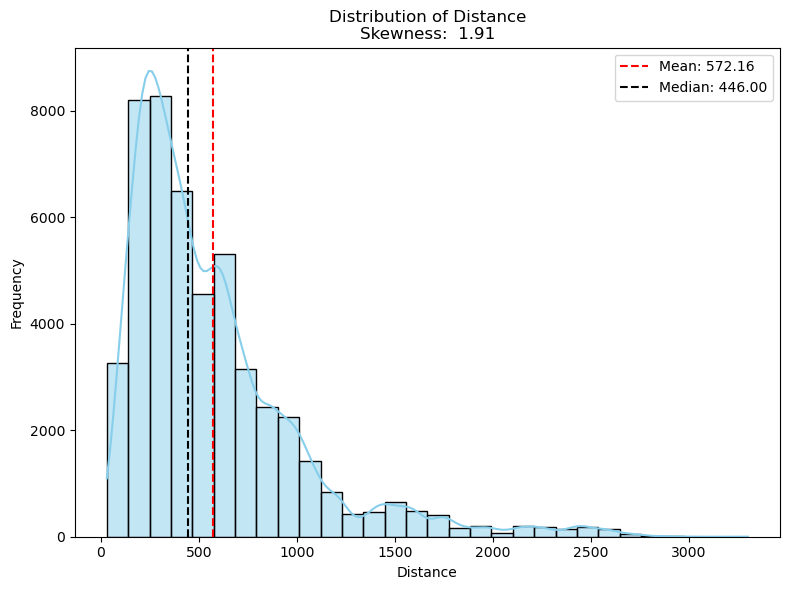

In [9]:
airline_df = pd.read_csv('airline_dec_2008_50k.csv')
distance = airline_df['Distance']

mean_distance = distance.mean()
median_distance = distance.median()
skewness_distance = distance.skew()

plt.figure(figsize = (8,6))
sns.histplot(distance, kde = True, color = 'skyblue', bins = 30)
plt.axvline(mean_distance, color = 'red', linestyle = '--', label = f'Mean: {mean_distance:.2f}')
plt.axvline(median_distance, color='black',linestyle='--', label=f'Median: {median_distance:.2f}')
plt.title(f'Distribution of Distance\nSkewness: {skewness_distance: .2f}')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()

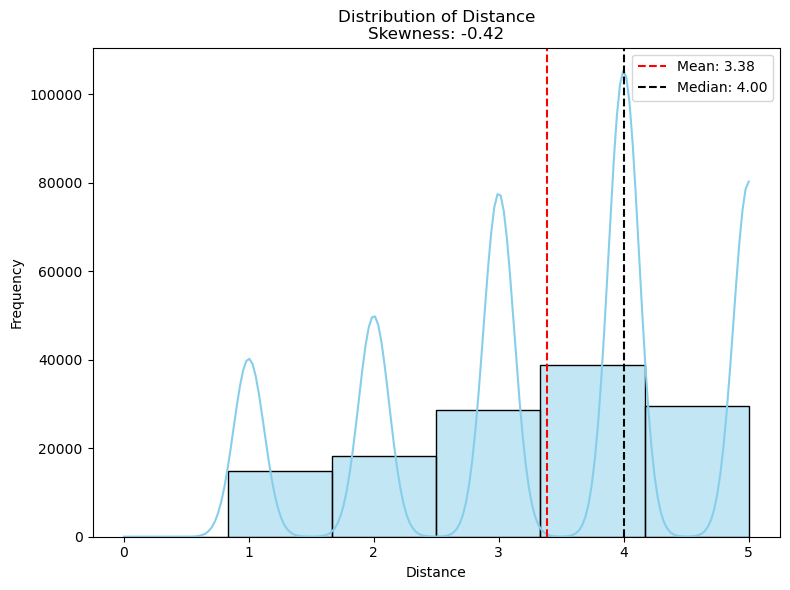

In [10]:
airline_df = pd.read_csv('airline_passenger_satisfaction.csv')
distance = airline_df['On-board Service']

mean_distance = distance.mean()
median_distance = distance.median()
skewness_distance = distance.skew()

plt.figure(figsize = (8,6))
sns.histplot(distance, kde = True, color = 'skyblue', bins = 6)
plt.axvline(mean_distance, color = 'red', linestyle = '--', label = f'Mean: {mean_distance:.2f}')
plt.axvline(median_distance, color='black',linestyle='--', label=f'Median: {median_distance:.2f}')
plt.title(f'Distribution of Distance\nSkewness: {skewness_distance: .2f}')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout() # tight plot is needed when there are multiple plots and we want tham to we arranged nicely
plt.show()

In [11]:
airline_df.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [12]:
airline_df['On-board Service'].unique()

array([3, 5, 4, 2, 1, 0], dtype=int64)

### Covariance

In [30]:
df=pd.read_csv('weight-height.csv')
print(df.head())

  Gender     Height      Weight
0   Male  73.847017  241.893563
1   Male  68.781904  162.310473
2   Male  74.110105  212.740856
3   Male  71.730978  220.042470
4   Male  69.881796  206.349801


In [38]:
df_male=df[df['Gender']=='Male']
df_female=df[df['Gender']=='Female']

#Calculate covariance
corr_overall=df[['Height','Weight']].corr()
corr_male=df_male[['Height','Weight']].corr()
corr_female=df_female[['Height','Weight']].corr()

In [40]:
# Calculate correlation
cov_overall=df[['Height','Weight']].cov()
cov_male=df_male[['Height','Weight']].cov()
cov_female=df_female[['Height','Weight']].cov()

In [46]:
print("Overall Correlation between Height and Weight:")
print(corr_overall)
print("\nMale Correlation between Height and Weight:")
print(corr_male)
print("\nFemale Correlation between Height and Weight:")
print(corr_female)

print("Overall Covariance between Height and Weight:")
print(cov_overall)
print("Male Covariance between Height and Weight:")
print(cov_male)
print("Female Covariance between Height and Weight:")
print(cov_female)

Overall Correlation between Height and Weight:
          Height    Weight
Height  1.000000  0.924756
Weight  0.924756  1.000000

Male Correlation between Height and Weight:
          Height    Weight
Height  1.000000  0.862979
Weight  0.862979  1.000000

Female Correlation between Height and Weight:
          Height    Weight
Height  1.000000  0.849609
Weight  0.849609  1.000000
Overall Covariance between Height and Weight:
            Height       Weight
Height   14.803473   114.242656
Weight  114.242656  1030.951855
Male Covariance between Height and Weight:
           Height      Weight
Height   8.198843   48.879649
Weight  48.879649  391.294074
Female Covariance between Height and Weight:
           Height      Weight
Height   7.269947   43.576404
Weight  43.576404  361.854281


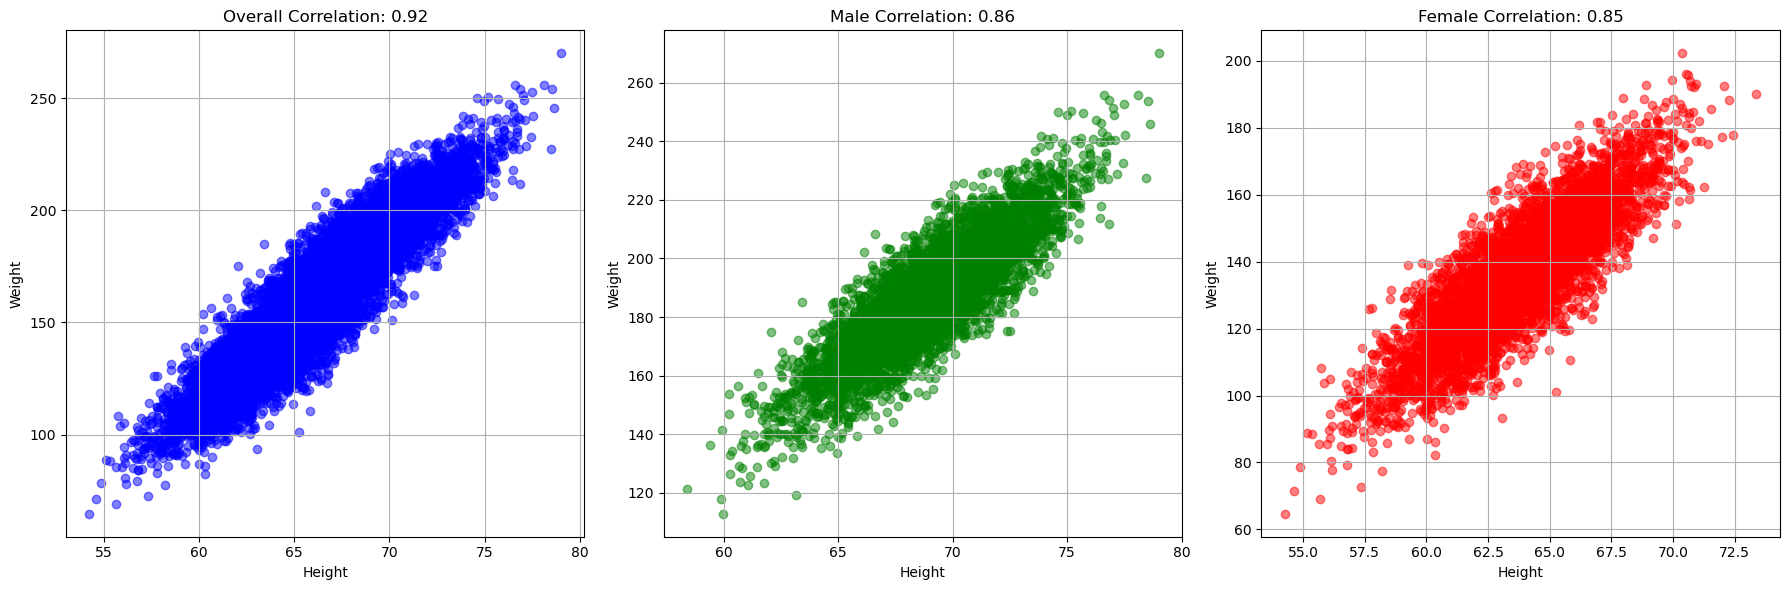

In [64]:
fig,axes=plt.subplots(1,3,figsize=(18,6))
#Overall data plot
axes[0].scatter(df['Height'],df['Weight'],color='blue',alpha=0.5)
axes[0].set_title(f'Overall Correlation: {corr_overall.loc['Height','Weight']:.2f}')
axes[0].set_xlabel('Height')
axes[0].set_ylabel('Weight')
axes[0].grid(True)

#amle data plot
axes[1].scatter(df_male['Height'],df_male['Weight'],color='green',alpha=0.5)
axes[1].set_title(f'Male Correlation: {corr_male.loc['Height','Weight']:.2f}')
axes[1].set_xlabel('Height')
axes[1].set_ylabel('Weight')
axes[1].grid(True)

#female data plot
axes[2].scatter(df_female['Height'],df_female['Weight'],color='red',alpha=0.5)
axes[2].set_title(f'Female Correlation: {corr_female.loc['Height','Weight']:.2f}')
axes[2].set_xlabel('Height')
axes[2].set_ylabel('Weight')
axes[2].grid(True)

plt.tight_layout()
plt.show()

#### Q EXERCISE ON CORR

In [68]:
df = pd.read_csv("SP500 oil gold bitcoin.csv")

In [70]:
df.head()

,Date,BITCOIN,Brent Oil,Crude Oil WTI,Gold,S&P500
0,2010-07-18,0.1,75.37,76.01,1188.0,1064.88
1,2010-07-19,0.1,75.62,76.54,1181.7,1071.25
2,2010-07-20,0.1,76.22,77.44,1191.5,1083.48
3,2010-07-21,0.1,75.37,76.56,1191.6,1069.59
4,2010-07-22,0.1,77.82,79.30,1195.5,1093.67


Text(0.5, 1.0, 'Correlation =  0.595')

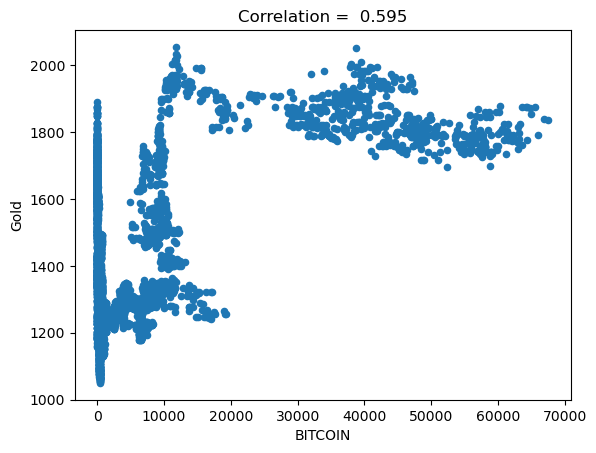

In [104]:
df.plot(kind = 'scatter', x = 'BITCOIN', y = 'Gold')
corr = df[['BITCOIN', 'Gold']].corr()
covv = df[['BITCOIN', 'Gold']].cov()
plt.title(f"Correlation = {corr.loc['BITCOIN', 'Gold']: .3f}")

Text(48620.11599999999, 2097.0352000000003, 'Correlation =  0.862')

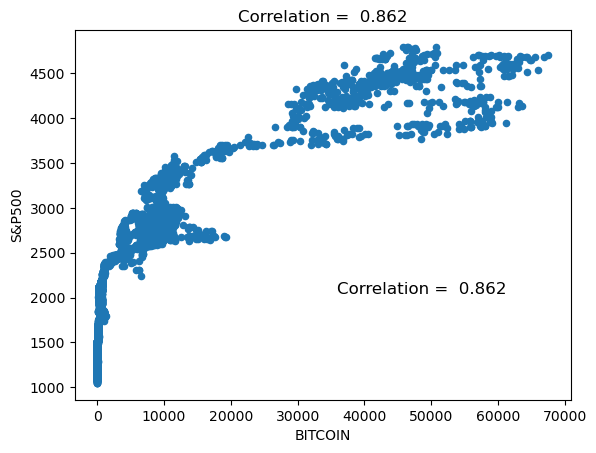

In [119]:
df.plot(kind = 'scatter', x = 'BITCOIN', y = 'S&P500')
corr = df[['BITCOIN', 'S&P500']].corr()
covv = df[['BITCOIN', 'S&P500']].cov()
plt.title(f"Correlation = {corr.loc['BITCOIN', 'S&P500']: .3f}")

xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
#Set the text position at 70% of the x-axis and 30% of the y-axis range
text_x = xmin + 0.7 * (xmax - xmin)
text_y = ymin + 0.3 * (ymax - ymin)

plt.text(text_x, text_y, f"Correlation = {corr.loc['BITCOIN', 'S&P500']: .3f}", ha='center',va='center',fontsize=12)
#Horizontal Alignment (ha): Controls how the text is positioned horizontally in relation to the x-cordinate,possible values: left,center,right
#Vertical Alignment(va): How to posiiton text vertically in relation to the y-coordinate, possible values: top, center, bottom

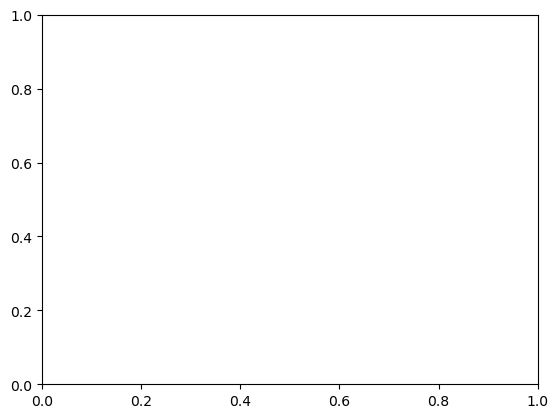

In [107]:
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
text_x = xmin + 0.7 * (xmax - xmin)
text_y = ymin + 0.3 * (ymax - ymin)

plt.text(test_x, test_y, f"Correlation = {corr.loc['BITCOIN', 'S&P500']: .3f}")